In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Задание 1
Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, 
при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression 
из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [3]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]

In [49]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["target price"])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(X_test)

In [42]:
y_pred.shape

(152, 1)

In [62]:
r2_score(y_test, y_pred)

0.711226005748496

In [ ]:
#### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],

чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно 
применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [65]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [67]:
y_pred = model.predict(X_test)

In [68]:
r2_score(y_test, y_pred)

0.87472606157312

Модель на основе случайного леса работает лучше (R2 score: 0.87472606157312) 

чем модель на основе линейной регрессии (R2 score: 0.711226005748496)

#### *Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [69]:
?RandomForestRegressor

In [72]:
model.feature_importances_.sum()

1.0

In [83]:
feature_names = X.keys()

In [129]:
importances1 = model.feature_importances_
importances2 = model.feature_importances_ # Для графика

In [130]:
# Отсортируем признаки по убыванию и выведем два последних признака, так как это будут максимально важные признаки
importances1.sort()
for i in range(len(importances1) -2, len(importances1)):
    print(importances1[i])

0.4026817857034993
0.4158473181914483


Для наглядности построим график на котором отразим название признаков по оси x

и величину важности признака по оси y

In [132]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Показатель важности признака')

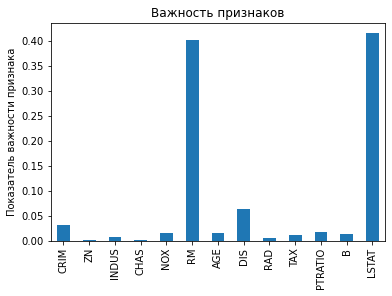

In [134]:
forest_importances = pd.Series(importances2, index=feature_names)

#fig, ax = plt.plots()
forest_importances.plot.bar()
plt.title("Важность признаков")
plt.ylabel("Показатель важности признака")

Как видно из графика двумя наиболее важными признаками являються RM и LSTAT

#### *Задание 4
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, 
это датасет Credit Card Fraud Detection. 

Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте 
являются мошенническими. Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),
так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.
Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df.

С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. 
Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.
Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
    
pd.options.display.max_columns = 100.

Просмотрите первые 10 строк датафрейма df.

Создайте датафрейм X из датафрейма df, исключив столбец Class.

Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: 
    test_size=0.3, random_state=100, stratify=y.

У вас должны получиться объекты X_train, X_test, y_train и y_test.

Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:

parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:

estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в 
массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, 
используя в качестве аргументов массивы y_test и y_pred_proba.


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [138]:
DATASET_PATH = '..\..\ДЗ\Урок4\creditcard.csv'
df = pd.read_csv(DATASET_PATH)

In [142]:
pd.options.display.max_columns = 100

In [143]:
df.value_counts(normalize=True)

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56    0        0.000063
          -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [156]:
X = df.select_dtypes(include=["float64"])

In [158]:
y = pd.Series(df["Class"])

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [171]:
print("X_train shape: {}\tX_test shape: {}\ny_train shape: {}\ty_test shape: {}".
      format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape: (199364, 30)	X_test shape: (85443, 30)
y_train shape: (199364,)	y_test shape: (85443,)


In [162]:
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

In [172]:
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3,
)

In [173]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [174]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [232]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [234]:
from sklearn.metrics import roc_auc_score

In [235]:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

#### *Дополнительные задания:
1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. 
Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, 
аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.

5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков 
создайте датафрейм под названием X.

6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному 
значению превышает 0.5 (причем, само поле target не должно входить в этот список).

10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых 
содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X 
соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. 
Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с 
признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.


In [3]:
from sklearn.datasets import load_wine

In [4]:
data = load_wine()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
data_keys = list(data.keys())

In [7]:
data_keys


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

In [8]:
data[data_keys[0]].shape

(178, 13)

In [9]:
data[data_keys[5]]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [10]:
print(data[data_keys[4]])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [11]:
data[data_keys[3]]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [12]:
feature_names = data[data_keys[5]]
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [13]:
X = pd.DataFrame(data[data_keys[0]], columns=feature_names)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [15]:
X.shape

(178, 13)

In [16]:
X["target"] = np.random.randint(3, size=178, dtype=np.int64)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [18]:
X_corr = X.corr()

In [19]:
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.004564
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.098757
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.001614
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,-0.039690
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.037660
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.034416
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.055367
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.090353
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.029483
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.020566


In [33]:
hi_corr = X_corr[(X_corr["target"].abs() > 0.05) & (X_corr["target"].abs() < 1) ]

In [46]:
hi_corr.index

Index(['malic_acid', 'flavanoids', 'nonflavanoid_phenols',
       'od280/od315_of_diluted_wines'],
      dtype='object')

In [49]:
X.drop(["target"], axis=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [47]:
for param in hi_corr.index:
    print(param)

malic_acid
flavanoids
nonflavanoid_phenols
od280/od315_of_diluted_wines


In [50]:
for param in hi_corr.index:
    X[(param + "_2")] = X[param] * 2

In [51]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,malic_acid_2,flavanoids_2,nonflavanoid_phenols_2,od280/od315_of_diluted_wines_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,3.42,6.12,0.56,7.84
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1,3.56,5.52,0.52,6.80
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,4.72,6.48,0.60,6.34
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,3.90,6.98,0.48,6.90
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,5.18,5.38,0.78,5.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1,11.30,1.22,1.04,3.48
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1,7.82,1.50,0.86,3.12
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,0,8.56,1.38,0.86,3.12
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,5.18,1.36,1.06,3.24


9 и 10 задания можно сделать подобным образом:
отобрать признаки, где корреляция высокая, а с помощью фильтрации:

high_corr = X_corr.loc['target', X_corr.columns != 'target']

high_corr = high_corr[high_corr > 0.5]

И подсчитать квадрат их значений:

for feature in high_corr:

X[f"{feature}_2"] = X[feature].pow(2)